<a href="https://colab.research.google.com/github/matsunori39/ml_interpret_book/blob/main/ml_interpret_book.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://github.com/ghmagazine/ml_interpret_book

# 2章 線形回帰モデルを通じて「解釈性」を理解する

## 2.3 実データでの線形モデルの分析

### 2.3.1 データの読み込み

In [1]:
import sys
import warnings
from dataclasses import dataclass
from typing import Any  # 型ヒント用
from __future__ import annotations  # 型ヒント用

In [2]:
!pip install japanize_matplotlib -q

     |████████████████████████████████| 4.1 MB 8.9 MB/s 


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import japanize_matplotlib  # matplotlibの日本語対応

In [5]:
!git clone https://github.com/ghmagazine/ml_interpret_book

Cloning into 'ml_interpret_book'...
remote: Enumerating objects: 36, done.
remote: Counting objects: 100% (36/36), done.
remote: Compressing objects: 100% (32/32), done.
remote: Total 36 (delta 4), reused 25 (delta 0), pack-reused 0
Unpacking objects: 100% (36/36), done.


In [9]:
# 自作モジュール
sys.path.append("./ml_interpret_book")
from mli.visualize import get_visualization_setting

In [11]:
np.random.seed(42)
pd.options.display.float_format = "{:.2f}".format
sns.set(**get_visualization_setting())
warnings.simplefilter("ignore") # warningsを非表示に

In [12]:
from sklearn.datasets import load_boston

In [13]:
# データセットの読み込み
boston = load_boston()

In [14]:
# データセットはdictで与えられる
# dataに特徴量が、targetに目的変数が格納されている
X = pd.DataFrame(data=boston.data, columns=boston.feature_names)
y = boston.target

### 2.3.2 データの前処理

In [15]:
def plot_histgram(x, title=None, x_label=None):
  """与えられた特徴量のヒストグラムを作成"""

  fig, ax = plt.subplots()
  sns.distplot(x, kde=False, ax=ax)
  fig.suptitle(title)
  ax.set_xlabel(x_label)

  fig.show()

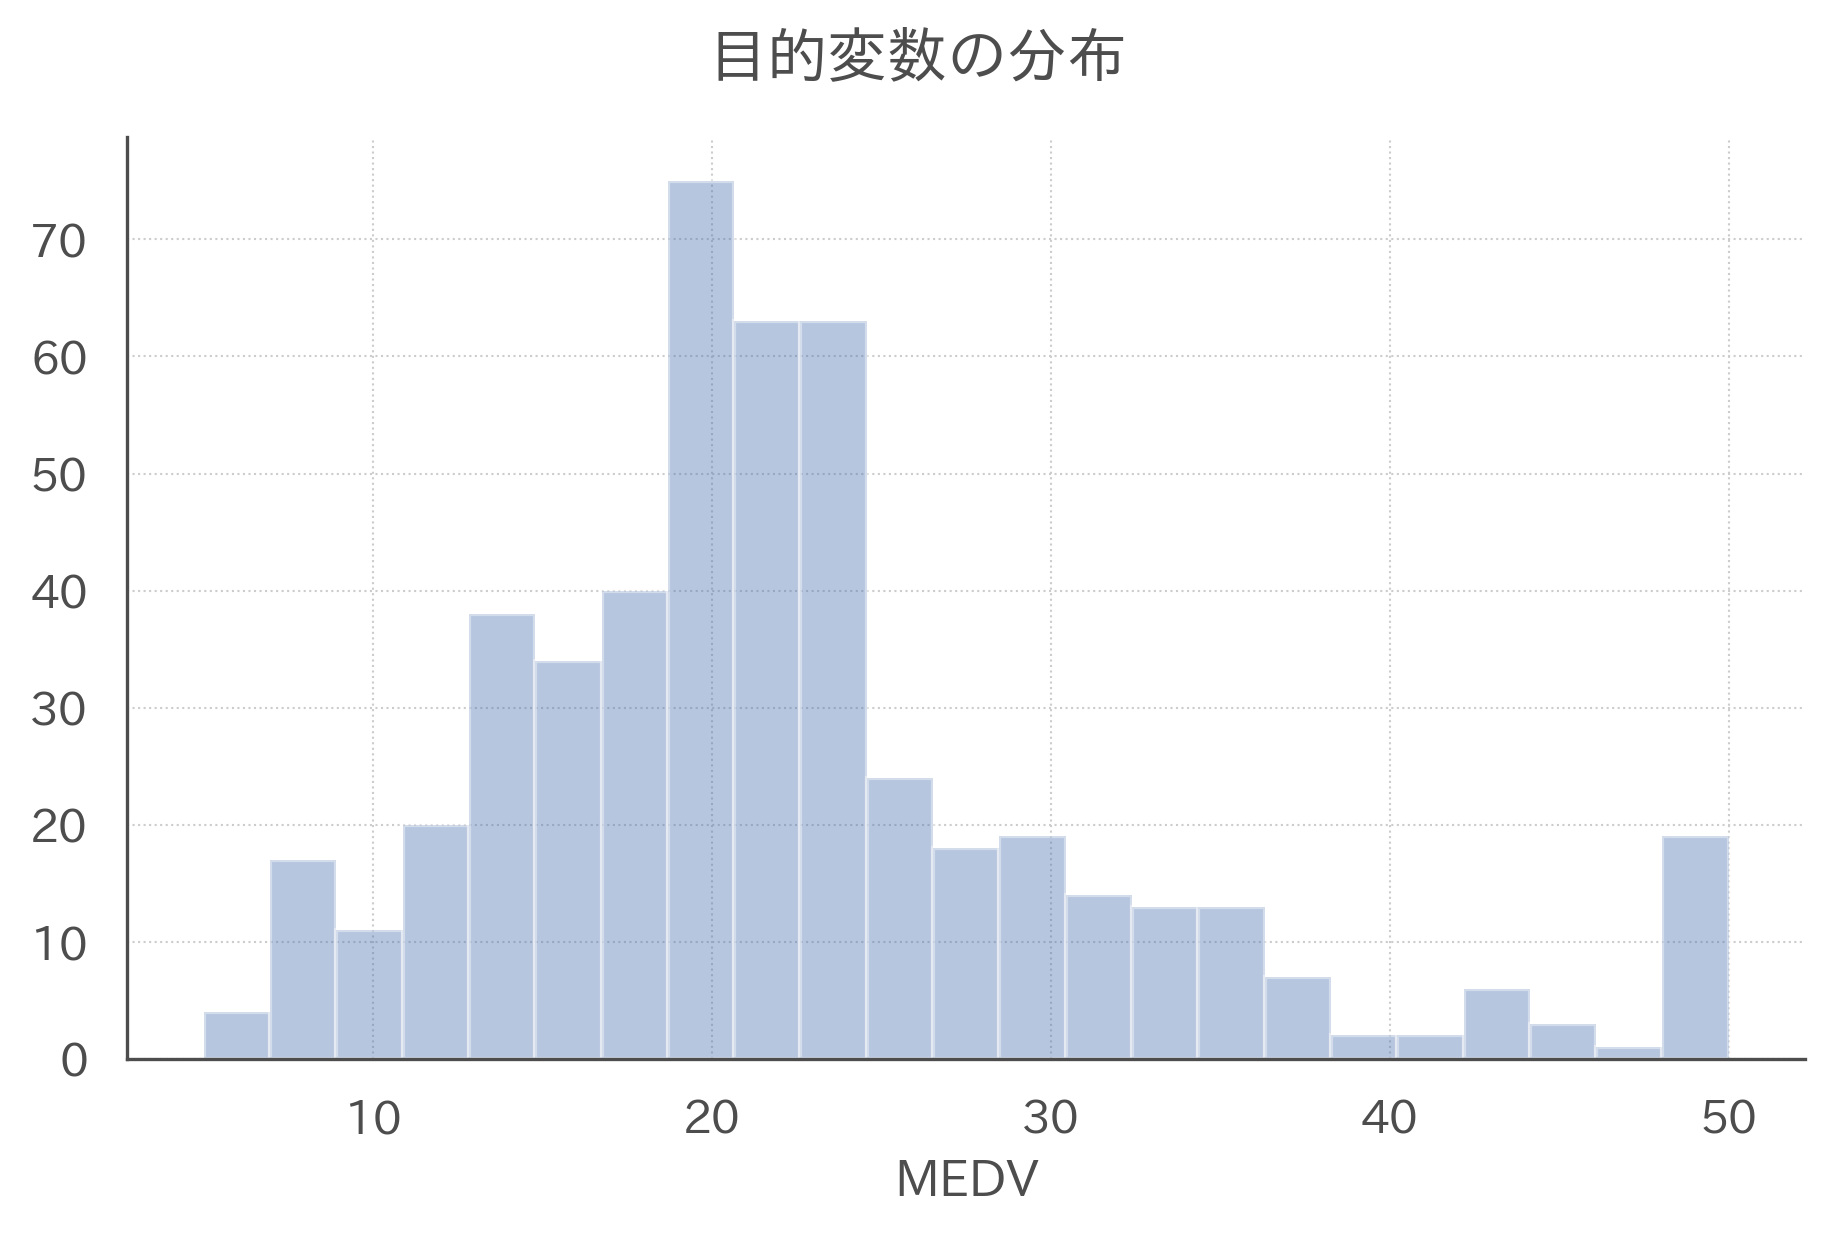

In [16]:
plot_histgram(y, title="目的変数の分布", x_label="MEDV")